<a href="https://colab.research.google.com/github/alixintong/btt-ai-know-your-customer/blob/han/practice_bounding_boxes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from fastai.vision.all import *

In [2]:
path = untar_data(URLs.PASCAL_2007)

In [3]:
path.ls()

(#8) [Path('/root/.fastai/data/pascal_2007/test'),Path('/root/.fastai/data/pascal_2007/valid.json'),Path('/root/.fastai/data/pascal_2007/test.csv'),Path('/root/.fastai/data/pascal_2007/train'),Path('/root/.fastai/data/pascal_2007/test.json'),Path('/root/.fastai/data/pascal_2007/train.csv'),Path('/root/.fastai/data/pascal_2007/segmentation'),Path('/root/.fastai/data/pascal_2007/train.json')]

In [4]:
imgs, lbl_bbox = get_annotations(path/'train.json')

In [5]:
imgs[0]


'000012.jpg'

In [6]:
lbl_bbox[0]

([[155, 96, 351, 270]], ['car'])

In [7]:
img2bbox = dict(zip(imgs, lbl_bbox))

In [10]:
first = {k: img2bbox[k] for k in list(img2bbox)[:1]}; first

{'000012.jpg': ([[155, 96, 351, 270]], ['car'])}

In [11]:
getters = [lambda o: path/'train'/o, lambda o: img2bbox[o][0], lambda o: img2bbox[o][1]]


In [12]:
item_tfms = [Resize(128, method='pad'),]
batch_tfms = [Rotate(), Flip(), Dihedral(), Normalize.from_stats(*imagenet_stats)]

In [13]:
def get_train_imgs(noop):  return imgs

In [14]:
pascal = DataBlock(blocks=(ImageBlock, BBoxBlock, BBoxLblBlock),
                 splitter=RandomSplitter(),
                 get_items=get_train_imgs,
                 getters=getters,
                 item_tfms=item_tfms,
                 batch_tfms=batch_tfms,
                 n_inp=1)

In [15]:
dls = pascal.dataloaders(path/'train')

In [16]:
dls.c = 20

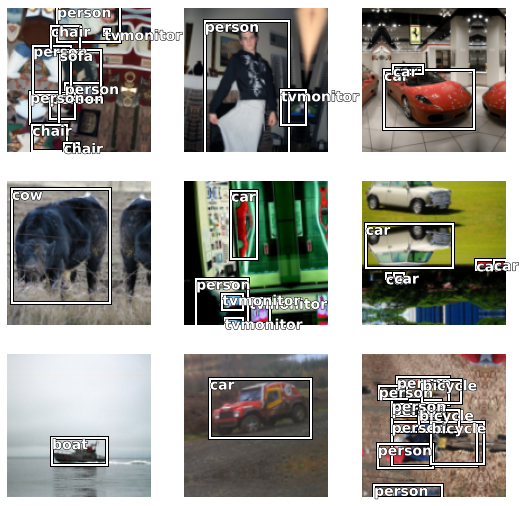

In [17]:
dls.show_batch()
